# 9)Design a Neural network with various optimization algorithms and analyse their performance using Keras.

In [ ]:
# Import Packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Split data into test and train
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Bulid Model
def build_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    return model

In [ ]:
# Function for Train and evaluate
def train_and_evaluate(optimizer):
    model = build_model()
    
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, 
                        epochs=20, 
                        batch_size=128, 
                        validation_data=(x_test, y_test))
    
    return history

In [ ]:
# Using different optimization functions
sgd_history = train_and_evaluate(tf.keras.optimizers.SGD())
rmsprop_history = train_and_evaluate(tf.keras.optimizers.RMSprop())
adam_history = train_and_evaluate(tf.keras.optimizers.Adam())

Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 1.1890 - accuracy: 0.6735 - val_loss: 0.6182 - val_accuracy: 0.8641
Epoch 2/20
469/469 [==============================] - 5s 12ms/step - loss: 0.6144 - accuracy: 0.8302 - val_loss: 0.4440 - val_accuracy: 0.8905
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.5016 - accuracy: 0.8555 - val_loss: 0.3812 - val_accuracy: 0.9034
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4462 - accuracy: 0.8723 - val_loss: 0.3465 - val_accuracy: 0.9083
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4098 - accuracy: 0.8827 - val_loss: 0.3233 - val_accuracy: 0.9113
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3833 - accuracy: 0.8907 - val_loss: 0.3045 - val_accuracy: 0.9175
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3642 - accuracy: 0.8968 - val_loss: 0.2903 - val_accuracy: 0.9207


Accuracy of SGD is : 0.8924391716718674
Accuracy of RMSprop is : 0.9771499991416931
Accuracy of Adam is : 0.977788332104683


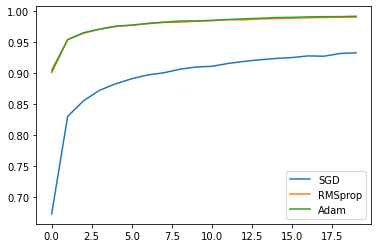

In [ ]:
# Plot the accuracy of each model
import matplotlib.pyplot as plt
import numpy as np
print("Accuracy of SGD is :",np.mean(sgd_history.history['accuracy']))
print("Accuracy of RMSprop is :",np.mean(rmsprop_history.history['accuracy']))
print("Accuracy of Adam is :",np.mean(adam_history.history['accuracy']))
plt.plot(sgd_history.history['accuracy'], label='SGD')
plt.plot(rmsprop_history.history['accuracy'], label='RMSprop')
plt.plot(adam_history.history['accuracy'], label='Adam')
plt.legend(loc='best')
plt.show()
# the output graph has overlapped of both Adam and RMSprop